*Рекомендуем запускать этот блокнот на GPU*

# ***Распознавание текстов, сгенерированных Chat-GPT***


В рамках IT-трека Академии научного наставничества ставится задача создания модели для распознавание сгенерированных Chat-GPT текстов.

Доступно соревнование на [kaggle](https://www.kaggle.com/competitions/chat-gpt-generated-text-detection).

## Считывание данных

Для удобства будем загружать данные с гугл-диска

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

path="/content/gdrive/MyDrive/Академия научного наставничества IT/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

train=pd.read_csv(path+"train.csv")
train

,id,text,author
0,3161,A new service called Twitter Alerts has been a...,chatgpt
1,24964,Swansea City fans will be delighted to hear th...,chatgpt
2,22861,Ready to go: Ross McCormack took part in Fulha...,person
3,68204,Penn Station is the busiest transportation hub...,chatgpt
4,10289,"The government, which had been the guarantor o...",chatgpt
...,...,...,...
84595,73004,"The cone-shaped machine, decelerated by a sequ...",chatgpt
84596,42153,CNN Student News offers a unique opportunity f...,chatgpt
84597,25941,"Cornelius Jefferson, a 33-year-old resident of...",chatgpt
84598,37518,Europe is experiencing a growing tendency away...,chatgpt


In [ ]:
test=pd.read_csv(path+"test.csv")
test

,id,text
0,68113,There have been 50 online bomb threats made si...
1,19660,"Haifa Port, situated on the Mediterranean coas..."
2,79151,Connecticut Senator Richard Blumenthal had a s...
3,8415,Ohio's governor on Friday signed an executive ...
4,12307,"Kadaram was not the only target of the attack,..."
...,...,...
9394,84010,It's likely someone from Hong Kong has just be...
9395,241,"Calvin Veltman undertook, for the National Cen..."
9396,24258,I was so paranoid I might find a lump that I e...
9397,26109,"By . Laura Powell . PUBLISHED: . 16:13 EST, 3 ..."


In [ ]:
!pip install autokeras

ERROR: Operation cancelled by user


In [ ]:
import autokeras as ak
clf = ak.TextClassifier(
    overwrite=True, max_trials=5
)  # It only tries 1 model as a quick demo.
# Feed the text classifier with training data.
clf.fit(train["text"].to_numpy(), train["author"], epochs=2, batch_size=256)

Exception ignored in: <function _xla_gc_callback at 0x7987464b3ac0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
vanilla           |vanilla           |text_block_1/block_type
0                 |0                 |classification_head_1/dropout
5000              |5000              |text_block_1/max_tokens
False             |False             |text_block_1/conv_block_1/separable
512               |512               |text_block_1/text_to_int_sequence_1/output_sequence_length
none              |none              |text_block_1/embedding_1/pretraining
64                |64                |text_block_1/embedding_1/embedding_dim
0.25              |0.25              |text_block_1/embedding_1/dropout
5                 |5                 |text_block_1/conv_block_1/kernel_size
1                 |1                 |text_block_1/conv_block_1/num_blocks
1                 |1                 |text_block_1/conv_block_1/num_layers
False             |False             |text_block_1/conv_block_1/max_pooling
0                 |0            

KeyboardInterrupt: ignored

## Исследование данных

**Проверим баланс классов**

В задаче классификации данные называются несбалансированными (Imbalanced Data), если в обучающей выборке доли объектов разных классов существенно различаются, также говорят, что «классы не сбалансированы».

<BarContainer object of 2 artists>

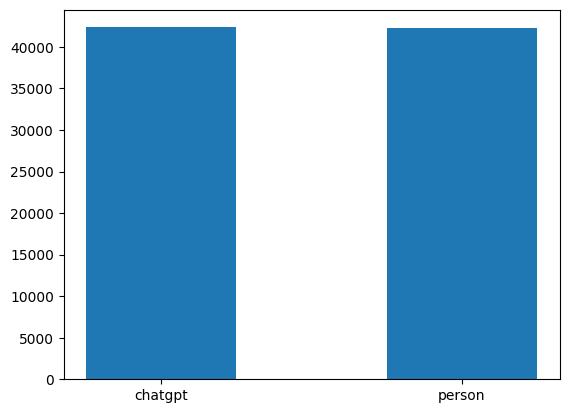

In [ ]:
import matplotlib.pyplot as plt

groups = ["chatgpt", "person"]
counts = [len(train.loc[train["author"]=="chatgpt"]), len(train.loc[train["author"]=="person"])]

plt.bar(groups, counts, width=0.5)

Рассмотрим распределение текстов по количеству предложений. Подобная информация о данных также может быть использована для классификации.

<Axes: >

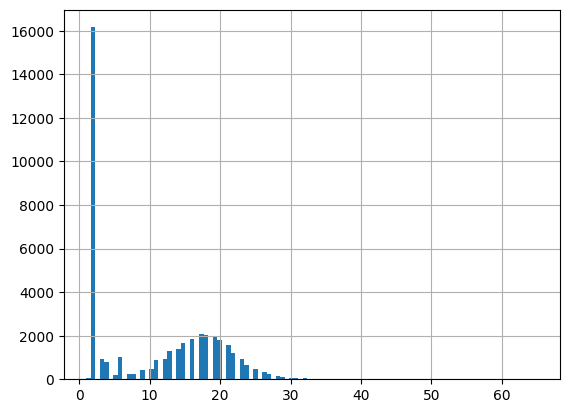

In [ ]:
seq_len = [len(str(i).split(".")) for i in train.loc[train["author"]=="chatgpt"]["text"]]
pd.Series(seq_len).hist(bins = 100)

<Axes: >

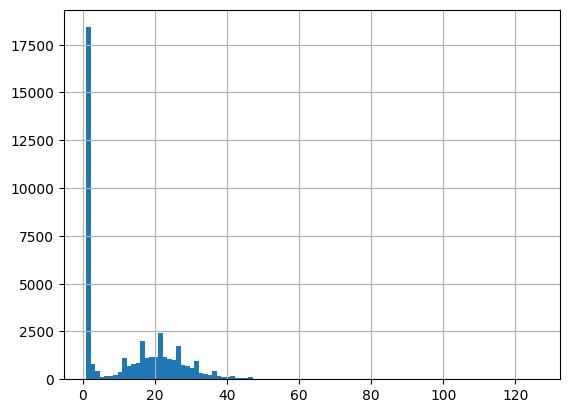

In [ ]:
seq_len = [len(str(i).split(".")) for i in train.loc[train["author"]=="person"]["text"]]
pd.Series(seq_len).hist(bins = 100)

Добавим информацию о числе предложений в наш DataFrame

Количество слов в текстах

<Axes: >

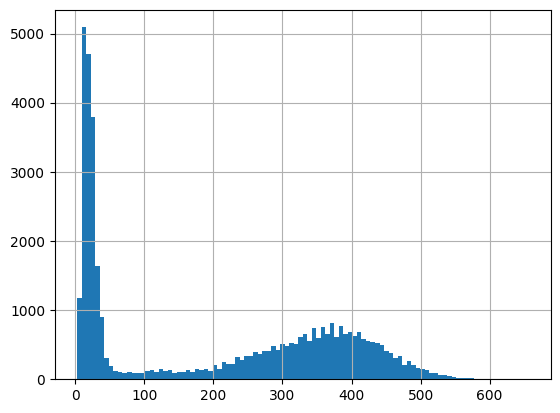

In [ ]:
seq_len = [len(str(i).split()) for i in train.loc[train["author"]=="chatgpt"]["text"]]
pd.Series(seq_len).hist(bins = 100)

<Axes: >

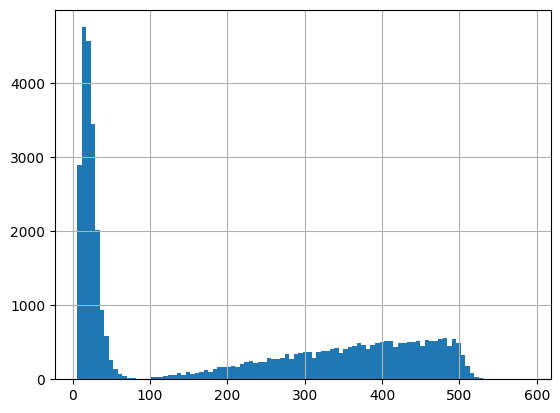

In [ ]:
seq_len = [len(str(i).split()) for i in train.loc[train["author"]=="person"]["text"]]
pd.Series(seq_len).hist(bins = 100)

In [ ]:
train

,id,text,author
0,3161,A new service called Twitter Alerts has been a...,chatgpt
1,24964,Swansea City fans will be delighted to hear th...,chatgpt
2,22861,Ready to go: Ross McCormack took part in Fulha...,person
3,68204,Penn Station is the busiest transportation hub...,chatgpt
4,10289,"The government, which had been the guarantor o...",chatgpt
...,...,...,...
84595,73004,"The cone-shaped machine, decelerated by a sequ...",chatgpt
84596,42153,CNN Student News offers a unique opportunity f...,chatgpt
84597,25941,"Cornelius Jefferson, a 33-year-old resident of...",chatgpt
84598,37518,Europe is experiencing a growing tendency away...,chatgpt


In [ ]:
train.loc[train["author"]=="chatgpt", 'author']=0
train.loc[train["author"]=="person", 'author']=1
train

,id,text,author
0,3161,A new service called Twitter Alerts has been a...,0
1,24964,Swansea City fans will be delighted to hear th...,0
2,22861,Ready to go: Ross McCormack took part in Fulha...,1
3,68204,Penn Station is the busiest transportation hub...,0
4,10289,"The government, which had been the guarantor o...",0
...,...,...,...
84595,73004,"The cone-shaped machine, decelerated by a sequ...",0
84596,42153,CNN Student News offers a unique opportunity f...,0
84597,25941,"Cornelius Jefferson, a 33-year-old resident of...",0
84598,37518,Europe is experiencing a growing tendency away...,0


При работе с текстами знаки препинания обычно удаляются, чтобы немного "очистить" данные.

Помимо удаления знаков препинания часто используется исключение всех неалфавитных символов

In [ ]:
import re

def del_s(df, col):
    text_list = []
    for row in range(len(df)):
        lemmatized_list = []
        text = df.iloc[row][col]
        text=re.sub("[^a-zA-Z]"," ",text)
        text_list.append(text)
    return text_list
train["text"]=del_s(train, "text")
test["text"]=del_s(test, "text")

## Наша нейросеть

**Перемешаем данные**

Это не так важно для обучения, а делается с целью оставить часть данных на тестирование и оценки точности решения задачи перед отправкой решения на kaggle

In [ ]:
from sklearn.utils import shuffle
train = shuffle(train)
train

,id,text,author
64762,85034,Basically this act transferred legislative po...,1
43230,13360,Republican Senator Ted Cruz is set to speak at...,0
20734,31066,A search and rescue mission is underway after ...,0
33348,78133,An exact replacement of Whitehead s cosmology ...,1
67613,47955,Upon its completion I will run through the...,0
...,...,...,...
54428,26503,Jared Diamond has assigned responsibility for ...,0
18291,40143,By Matt Morlidge Follow MattMorlidge A...,1
24306,93875,Rihanna postponed a concert in Malaysia that w...,1
25862,56336,Later in Ross Sackett performed two dis...,1


In [ ]:
import nltk
import re

nltk.download("stopwords") # поддерживает удаление стоп-слов
nltk.download('wordnet') # проводит лемматизацию
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


***Токенизация*** - метод позволяющий разделить текст на так называемые токены, то есть на слова или предложения.

***Лемматизация*** - приведение словоформы к лемме — ее нормальной (словарной) форме. Другими словами, лемматизация схожа с выделением основы каждого слова в предложении. Она обычно выполняется простым поиском форм в таблице.

***Стемминг*** - это процесс обрезания конца или начала слов с целью удаления аффиксов (лексических дополнений к корню слова).

***Векторизация текста*** - преобразование текста в численную форму. Алгоритмы машинного обучения не умеют работать с текстом, поэтому необходимо превратить текст в цифры.

Часть информации при образовании текста в численную форму теряется. Качественная работа с данными позволяет получить хороший результат с самыми простыми алгоритмами классификации. И наоборот, если будет потерено много информации при предобработке, то даже самые сложные алгоритмы не помогут.

Сначала проведём токенизацию, разделив каждый текст на отдельные слова, а затем приведём каждое слово к лемме

In [ ]:
def func(df, col):
    wordnet_lemmatizer = nltk.WordNetLemmatizer()
    lemmatized_text_list = []
    for row in range(len(df)):
        lemmatized_list = []
        text = df.iloc[row][col]
        text_words = text.split(" ")
        for word in text_words:
            word_norm = wordnet_lemmatizer.lemmatize(word)
            lemmatized_list.append(word_norm)
        lemmatized_text = " ".join(lemmatized_list)
        lemmatized_text_list.append(lemmatized_text)
    return lemmatized_text_list


train["text"] = func(train, "text")
test["text"] = func(test, "text")

In [ ]:
all_data=pd.concat([train, test])
all_data

,id,text,author
64762,85034,Basically this act transferred legislative po...,1
43230,13360,Republican Senator Ted Cruz is set to speak at...,0
20734,31066,A search and rescue mission is underway after ...,0
33348,78133,An exact replacement of Whitehead s cosmology ...,1
67613,47955,Upon it completion I will run through the ...,0
...,...,...,...
9394,84010,It s likely someone from Hong Kong ha just bea...,NaN
9395,241,Calvin Veltman undertook for the National Cen...,NaN
9396,24258,I wa so paranoid I might find a lump that I ev...,NaN
9397,26109,By Laura Powell PUBLISHED EST ...,NaN


При использовании нейронной сети преобразование текста в векторную форму используется специальный Embeddibg слой нейронной сети. Но для этого слоя надо изначально заменить слова на их индексы (для этого создаётся словарь, в котором в соответствие каждому слову ставится некоторое число).

Для этой задачи используется TextVectorization.

In [ ]:
import tensorflow as tf

# определяем TextVectorization. Максимальная длина теста - 10 000 слов
vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=10000,
    output_mode='int',
    output_sequence_length=2000)

vectorize_layer.adapt(all_data["text"])

features_train = vectorize_layer(train["text"])

features_train

<tf.Tensor: shape=(84600, 2000), dtype=int64, numpy=
array([[7822,   28,  524, ...,    0,    0,    0],
       [2070, 2661, 5174, ...,    0,    0,    0],
       [   3,  648,    5, ...,    0,    0,    0],
       ...,
       [5369, 6511,    3, ...,    0,    0,    0],
       [ 285,    7, 4596, ...,    0,    0,    0],
       [   2,   80,   47, ...,    0,    0,    0]])>

При работе с нейронными сетями обычно используются GPU/TPU для ускорения векторных вычислений.

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

Соберём свою нейросеть

Embedding layer берет численно-кодированный словарь и ищет встроенный вектор для каждого слова-индекса. Эти вектора обучаются в ходе тренировки модели.

GlobalAveragePooling1D слой возвращает выводной вектор фиксированной длины для каждого примера путем усреднения по размерности последовательности. Это позволяет модели обрабатывать ввод переменной длины простейшим возможным способом.

DenseLayer - полносвязный слой, используется для извлечения основной информации

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

vocab_size = 10000 # количество уникальных слов в словаре
embedding_dim = 1024 # число параметров после эмбеддинга
max_length = 2000 # максимальная длина новости


model = tf.keras.Sequential([
  layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(128),
  layers.Dense(1)])

model.compile(loss='binary_crossentropy',
                metrics=[tf.metrics.BinaryAccuracy(threshold=0.5)],
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 2000, 1024)        10240000  
                                                                 
 dropout_4 (Dropout)         (None, 2000, 1024)        0         
                                                                 
 global_average_pooling1d_1  (None, 1024)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               131200    
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                      

In [ ]:
import torch
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
import tensorflow as tf

with tf.device('/GPU:0'):

  vocab_size = 10000 # количество уникальных слов в словаре
  embedding_dim = 1024 # число параметров после эмбеддинга
  max_length = 2000 # максимальная длина новости

  model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
      tf.keras.layers.GlobalAveragePooling1D(),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
       tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid') # 1 - число выходных нейронов (для задачи бинарной классификации достаточно одного нейрона)
  ])
  model.compile(loss='binary_crossentropy',
                metrics=[tf.metrics.BinaryAccuracy(threshold=0.5)],
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2000, 1024)        10240000  
                                                                 
 global_average_pooling1d (G  (None, 1024)             0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                        

num_epochs - количество раз, которое будут прогоняться все данные для обучения

batch_size - количество тектов, которые используются на одной итерации для обучения

validation_split - доля тестовых данных, которые будут использоваться для валидации (тестирования во время обучения, чтобы отследить, как модель работает с данными, которые она раньше не видела)

In [ ]:
num_epochs = 10
model.fit(features_train, # X
          tf.convert_to_tensor(list(train["author"].to_numpy())),# y
          batch_size=128,
          validation_split=0.1,
          epochs=num_epochs)

Epoch 1/10
595/595 [==============================] - 3303s 6s/step - loss: 0.7120 - binary_accuracy: 0.5484 - val_loss: 0.6574 - val_binary_accuracy: 0.6660
Epoch 2/10
 53/595 [=>............................] - ETA: 50:49 - loss: 0.6530 - binary_accuracy: 0.6514

In [ ]:
test

,id,text
0,68113,There have been online bomb threat made sin...
1,19660,Haifa Port situated on the Mediterranean coas...
2,79151,Connecticut Senator Richard Blumenthal had a s...
3,8415,Ohio s governor on Friday signed an executive ...
4,12307,Kadaram wa not the only target of the attack ...
...,...,...
9394,84010,It s likely someone from Hong Kong ha just bea...
9395,241,Calvin Veltman undertook for the National Cen...
9396,24258,I wa so paranoid I might find a lump that I ev...
9397,26109,By Laura Powell PUBLISHED EST ...


Предсказываем ответы для тестовой выборки

In [ ]:
features_test = vectorize_layer(test["text"])
with tf.device('/GPU:0'):

  res=model.predict(features_test)
total=[round(i[0]) for i in res]
test.loc[:, "author"]=total

294/294 [==============================] - 1s 4ms/step


In [ ]:
test

,id,text,author
0,68113,There have been online bomb threat made sin...,1
1,19660,Haifa Port situated on the Mediterranean coas...,0
2,79151,Connecticut Senator Richard Blumenthal had a s...,0
3,8415,Ohio s governor on Friday signed an executive ...,1
4,12307,Kadaram wa not the only target of the attack ...,1
...,...,...,...
9394,84010,It s likely someone from Hong Kong ha just bea...,0
9395,241,Calvin Veltman undertook for the National Cen...,1
9396,24258,I wa so paranoid I might find a lump that I ev...,1
9397,26109,By Laura Powell PUBLISHED EST ...,1


In [ ]:
output=test.drop(columns=["text"])
output.loc[:, "author"] = total
output

,id,author
0,68113,1
1,19660,0
2,79151,0
3,8415,1
4,12307,1
...,...,...
9394,84010,0
9395,241,1
9396,24258,1
9397,26109,1


In [ ]:
from google.colab import files
output.to_csv("solution.csv", index=False)

files.download("solution.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>